# Laboratory 05

## Exercise 1
• A publishing company has recently launched a new journal. In order to determine how effective it
is in reaching its possible audience, a market survey company selects a random sample of people
from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read
the last issue of the journal.

### a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal?

In [1]:
## Binomial distribution with a success probability p.
likelihood <- function(k,size,p){dbinom(k,size,p)}

### b) Assuming a uniform prior, what is the posterior distribution for y?

In [2]:
prior <- dunif
posterior <- function(x){likelihood(29,150,x)*prior(x)}

### c) Plot both posterior and likelihood ditributions functions

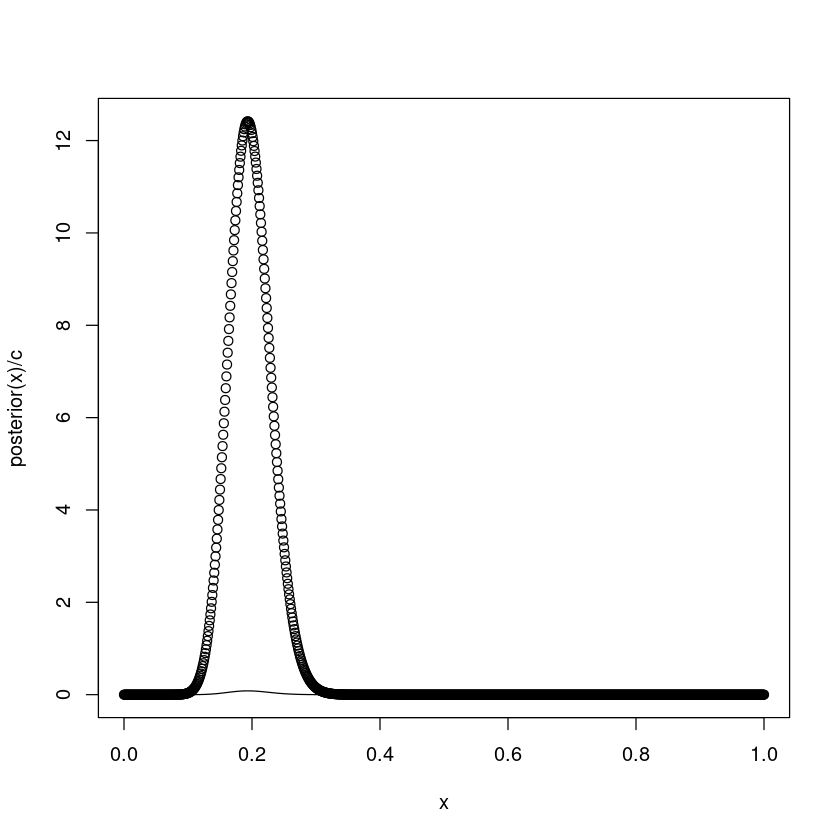

In [3]:
x <- seq(0,1,0.001)
c <- integrate(posterior,0,1)$value
plot(x, posterior(x)/c)
lines(x,likelihood(29,150,x))

## Exercise 2
Three students want to construct their prior probability about the proportion of residents that support the building of a new concert hall in their small town.

- Anna thinks that her prior is a beta distribution with mean 0.2 and a standard deviation of 0.08.

- Benny moved only recently to this new town and therefore he does non have the slightest idea about it. Therefore he decides to use a uniform prior.

- Chris believes that his prior should have a trapezoidal shape:

$$
\begin{align}
f(X)=\left\{
    \begin{array}\\
    20x,\ &0\le x\lt 0.1\\
    2,\ &0.1\le x\lt 0.3\\
    5-10x,\ &0.3\le x\lt 0.5\\
    0,\ &x\ge 0.5
    \end{array}\right.
\end{align}
$$


### a) Draw and compare the three prior distributions.

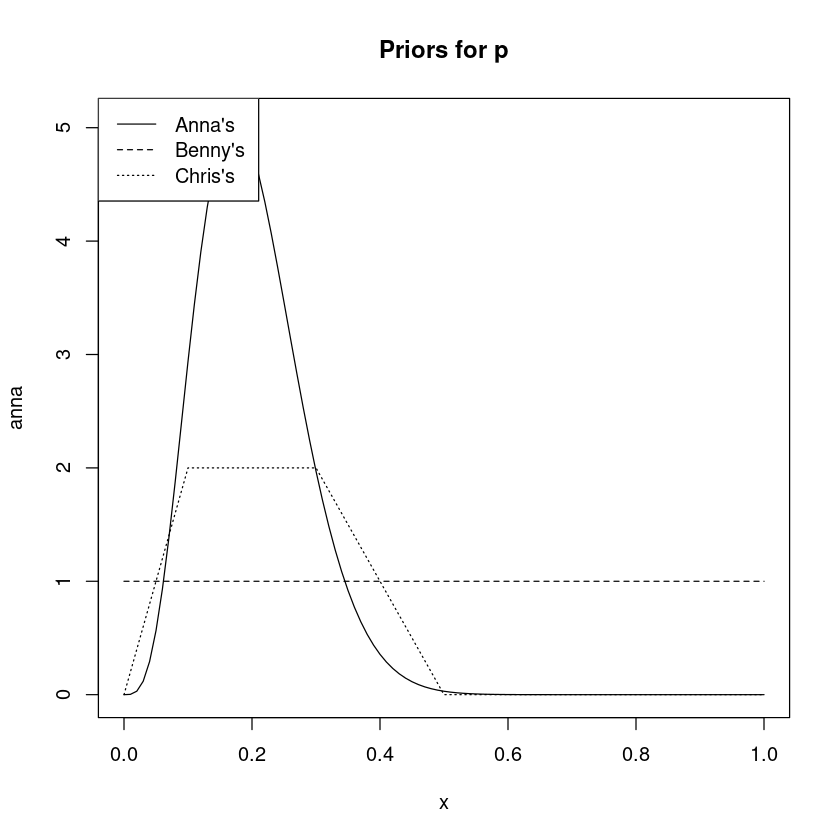

In [7]:
# After some algebra, we get that a beta distributions parameters are given as:
mu =0.2
sig = 0.08
alph <- (mu**2-mu**3-mu*sig**2)/sig**2
bet <- sig**2*(alph**2+alph)/(mu**2-sig**2*alph)

anna <- function(x){dbeta(x,alph,bet)}

benny <- function(x){dunif(x)}

chris <- function(x){
    if(x >= 0.5 | x < 0){
        return(0)
    }
    if(x>=0.3){
        return(5-10*x)
    }
    if(x >= 0.1){
        return(2)
    }
    return(20*x)
}
x <- seq(0,1,0.01)
chris<- Vectorize(chris)

plot(anna, lty = 1, main = "Priors for p")
lines(x,benny(x), lty =2)
lines(x, chris(x), lty = 3)
legend("topleft",legend = c("Anna's","Benny's", "Chris's"), lty =1:3)

In [10]:
integrate(benny,0,1)

1 with absolute error < 1.1e-14

The next day the three students decide to interview a sample of 100 citizens of the small town, asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert hall.

### b) Evaluate and draw the three posterior distributions.

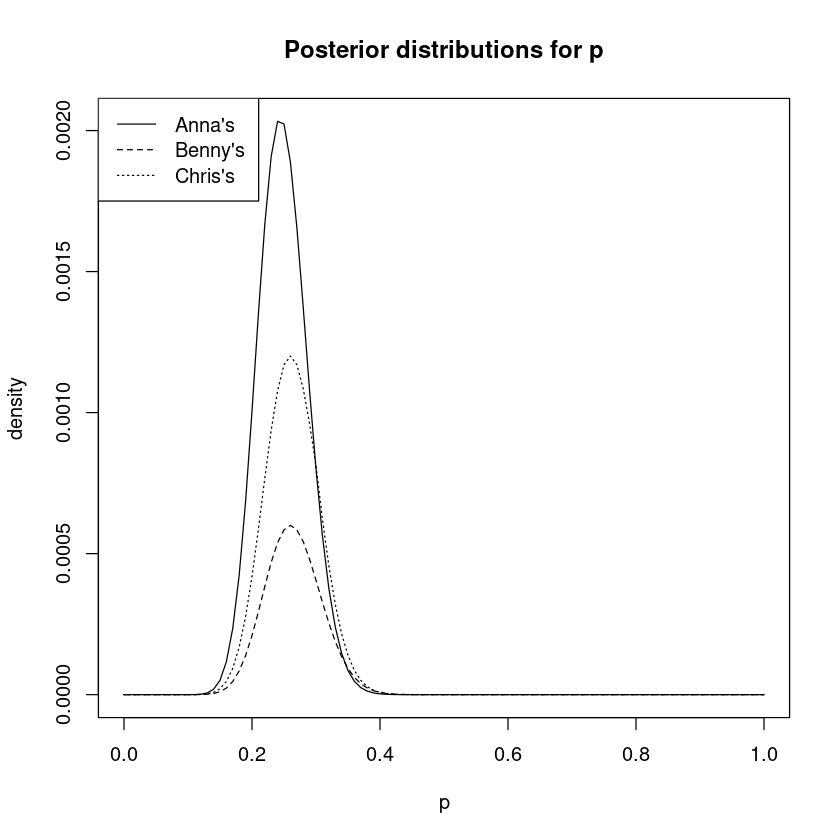

In [15]:
# we set a binomial distribution for the likelihood
likelihood <- function(p){dbinom(26,100,p)}

post_dist <- function(likelihood,prior_dist){
    pre_post <- function(x){likelihood(x)*prior_dist(x)}
    c_post <- 1/integrate(pre_post,0,1)$value
    return(function(x){c*pre_post(x)})
}


post_anna <- post_dist(likelihood,anna)
post_benny <- post_dist(likelihood,benny)
post_chris <- post_dist(likelihood,chris)

plot(post_anna, main = 'Posterior distributions for p', lty = 1, ylab ='density', xlab = 'p')
lines(x,post_benny(x), lty = 2)
lines(x,post_chris(x), lty = 3)
legend("topleft",legend = c("Anna's","Benny's", "Chris's"), lty =1:3)

### c)  Give an estimate of the most probable value and the 95% credibility interval

## Exercise 3
A coin is flipped n = 30 times with the following outcomes:
$$
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H
$$

### a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

### b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

### c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

### d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?